## Importing the Libraries

In [54]:
import numpy as np
import pandas as pd 
from tensorflow.keras.layers import Input, Conv2D, GlobalMaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, MaxPooling2D
from glob import glob
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.models import Sequential 
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import pprint
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
import tensorflow as tf
print(tf.__version__)

2.6.0


## Loading the Data

In [37]:
train_path = 'fruits-360-original-size/Training/'
test_path = 'fruits-360-original-size/Test/'
validation_path = 'fruits-360-original-size/Validation/'
fruits = []
fruits_image = []
for i in os.listdir(train_path):
    for image_filename in os.listdir(train_path + i):
        fruits.append(i) # name of the fruit 
        fruits_image.append(i + '/' + image_filename) # image of the fruit
        
train_fruits = pd.DataFrame(fruits, columns=["Fruits"])
train_fruits["Fruits Image"] = fruits_image

In [38]:
''' Printing the types of fruits in Training dataset '''

train_labels = os.listdir("fruits-360-original-size/Training/")

pp = pprint.PrettyPrinter(width=120, compact=True)
number_classes = len(train_labels)
print("Total Labels we have : ",number_classes)
train_labels.sort()
pp.pprint(train_labels)

Total Labels we have :  24
['apple_6', 'apple_braeburn_1', 'apple_crimson_snow_1', 'apple_golden_1', 'apple_golden_2', 'apple_golden_3',
 'apple_granny_smith_1', 'apple_hit_1', 'apple_pink_lady_1', 'apple_red_1', 'apple_red_2', 'apple_red_3',
 'apple_red_delicios_1', 'apple_red_yellow_1', 'apple_rotten_1', 'cabbage_white_1', 'carrot_1', 'cucumber_1',
 'cucumber_3', 'eggplant_violet_1', 'pear_1', 'pear_3', 'zucchini_1', 'zucchini_dark_1']


In [39]:
train_fruits

,Fruits,Fruits Image
0,apple_6,apple_6/r0_0.jpg
1,apple_6,apple_6/r0_10.jpg
2,apple_6,apple_6/r0_100.jpg
3,apple_6,apple_6/r0_102.jpg
4,apple_6,apple_6/r0_104.jpg
...,...,...
6226,zucchini_dark_1,zucchini_dark_1/r0_90.jpg
6227,zucchini_dark_1,zucchini_dark_1/r0_92.jpg
6228,zucchini_dark_1,zucchini_dark_1/r0_94.jpg
6229,zucchini_dark_1,zucchini_dark_1/r0_96.jpg


## Frequent Fruits

In [40]:
from collections import Counter

pop_fruit = Counter(train_fruits['Fruits'])
pop_fruit = pop_fruit.most_common(15)
pop_fruit

[('apple_hit_1', 468),
 ('pear_1', 326),
 ('apple_braeburn_1', 320),
 ('apple_granny_smith_1', 320),
 ('apple_rotten_1', 319),
 ('apple_crimson_snow_1', 318),
 ('apple_red_2', 318),
 ('apple_golden_3', 316),
 ('apple_6', 315),
 ('apple_pink_lady_1', 313),
 ('apple_red_1', 309),
 ('apple_golden_1', 308),
 ('apple_golden_2', 308),
 ('apple_red_yellow_1', 308),
 ('apple_red_delicios_1', 300)]

In [41]:
x,y = zip(*pop_fruit)
x,y = list(x),list(y)
pp.pprint(x)
print(y)

['apple_hit_1', 'pear_1', 'apple_braeburn_1', 'apple_granny_smith_1', 'apple_rotten_1', 'apple_crimson_snow_1',
 'apple_red_2', 'apple_golden_3', 'apple_6', 'apple_pink_lady_1', 'apple_red_1', 'apple_golden_1', 'apple_golden_2',
 'apple_red_yellow_1', 'apple_red_delicios_1']
[468, 326, 320, 320, 319, 318, 318, 316, 315, 313, 309, 308, 308, 308, 300]


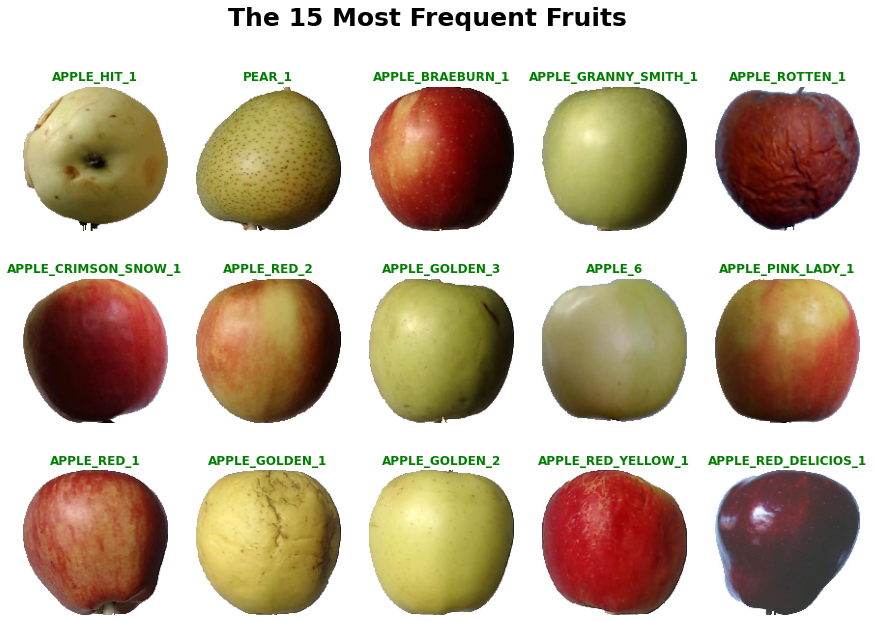

In [42]:
plt.figure(figsize=(15,10))
how_many_fruits = len(x)

for i in range(how_many_fruits):
    fruits = train_fruits[train_fruits["Fruits"] == x[i]]["Fruits Image"].values [1]
    
    plt.subplot(3,5,i+1)
    img = load_img(train_path + fruits, target_size=(150,150))
    plt.imshow(img)
    plt.title(x[i].upper(), color = "green", fontsize = 12 , fontweight = 600)
    plt.axis("off")

plt.suptitle("The 15 Most Frequent Fruits", fontsize = 25 , color = "Black", fontweight = 'bold')
plt.show()

In [43]:
#Image shape

#img = load_img('fruits-360-original-size/Training/apple_6/r0_0.jpg', target_size=(150,150))

#plt.imshow(img)

#print("*****Image's shape: ",img_to_array(img).shape)

## CNN Model 

In [44]:
#Apply keras functional API to build model

i = Input(shape = img_to_array(img).shape)

x = Conv2D(filters = 32, kernel_size= (3,3), activation = 'relu')(i)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)

x = Conv2D(filters = 64, kernel_size= (3,3), activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)

x = Conv2D(filters = 128, kernel_size= (3,3), activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024,activation= 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(1024,activation= 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(1024,activation= 'relu')(x)
x = Dropout(0.2)(x)
prediction = Dense(number_classes,activation='softmax')(x)

model = Model(i,prediction)

In [45]:
#Compile our model
model.compile(optimizer = 'Adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [46]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0   

## Data Augmentation

In [57]:
epochs = 10
batch_size = 32

In [58]:
# create an instance of ImageDataGenerator

train_gen = ImageDataGenerator(
  width_shift_range = 0.1,
  height_shift_range = 0.1,
  shear_range = 0.1,
  zoom_range = 0.2,
  rescale = 1./255,
  horizontal_flip = True
)

test_gen = ImageDataGenerator(width_shift_range=0.1,
  height_shift_range = 0.1,
  shear_range = 0.1,
  zoom_range = 0.2,
  rescale = 1./255,
  horizontal_flip = True
)

valid_gen = ImageDataGenerator(width_shift_range=0.1,
  height_shift_range = 0.1,
  shear_range = 0.1,
  zoom_range = 0.2,
  rescale = 1./255,
  horizontal_flip = True
)

In [59]:
target_size = img_to_array(img).shape[:2]
target_size

(150, 150)

In [60]:
# create generators

train_generator = train_gen.flow_from_directory(
  train_path,
  target_size=target_size,
  shuffle=True,
  batch_size=batch_size,
    color_mode= "rgb",
        class_mode= "categorical"
)

test_generator = test_gen.flow_from_directory(
  test_path,
  target_size=target_size,
  shuffle=False,
  batch_size=batch_size,
    color_mode= "rgb",
        class_mode= "categorical"
)

valid_generator = valid_gen.flow_from_directory(
  validation_path,
  target_size=target_size,
  shuffle=False,
  batch_size=batch_size,
    color_mode= "rgb",
        class_mode= "categorical"
)

Found 6231 images belonging to 24 classes.
Found 3110 images belonging to 24 classes.
Found 3114 images belonging to 24 classes.


## Loading the CNN Model 

In [61]:
# useful for getting number of files

num_train_files = glob(train_path + '/*/*.jp*g')
num_test_files = glob(test_path + '/*/*.jp*g')
num_valid_files = glob(validation_path + '/*/*.jp*g')

In [62]:
print(len(num_valid_files))

3114


### Call Back

In [75]:
# Using 3 callbacks namely early stopping, csvlogger and check point

checkpoint = ModelCheckpoint(filepath = 'saved_models/accuracy_improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5', monitor = "val_accuracy", verbose = 1, save_best_only = True, mode = "max")


earlystop = EarlyStopping(monitor = "val_loss", patience = 3, verbose = 1)


# Create My_logs.csv file with epoch, acc, loss, val_acc, val_loss columns in it

csvlogger = CSVLogger('My_logs.csv', separator = ',', append = False)

call_back = [checkpoint, earlystop, csvlogger]

In [76]:
# fit the model

r = model.fit_generator(
  train_generator,
  validation_data = test_generator,
  epochs = 10,
  callbacks = call_back,
  steps_per_epoch= len(num_train_files) // batch_size,
  validation_steps= len(num_test_files) // batch_size,
)

Epoch 1/10
194/194 [==============================] - 243s 1s/step - loss: 0.1801 - accuracy: 0.9598 - val_loss: 1.7391 - val_accuracy: 0.7245

Epoch 00001: val_accuracy improved from -inf to 0.72455, saving model to saved_models\accuracy_improvement-01-0.72.hdf5
Epoch 2/10
194/194 [==============================] - 274s 1s/step - loss: 0.3947 - accuracy: 0.9248 - val_loss: 1.1063 - val_accuracy: 0.8112

Epoch 00002: val_accuracy improved from 0.72455 to 0.81121, saving model to saved_models\accuracy_improvement-02-0.81.hdf5
Epoch 3/10
194/194 [==============================] - 315s 2s/step - loss: 0.1997 - accuracy: 0.9523 - val_loss: 0.1427 - val_accuracy: 0.9633

Epoch 00003: val_accuracy improved from 0.81121 to 0.96327, saving model to saved_models\accuracy_improvement-03-0.96.hdf5
Epoch 4/10
194/194 [==============================] - 312s 2s/step - loss: 0.1082 - accuracy: 0.9723 - val_loss: 0.1030 - val_accuracy: 0.9768

Epoch 00004: val_accuracy improved from 0.96327 to 0.97680

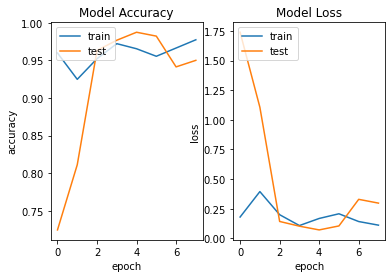

In [77]:
import matplotlib.pyplot as plt 
plt.figure(1)  

 # summarize history for accuracy  
plt.subplot(1,2,1)  
plt.plot(r.history['accuracy'])  
plt.plot(r.history['val_accuracy'])  
plt.title('Model Accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(1,2,2)  
plt.plot(r.history['loss'])  
plt.plot(r.history['val_loss'])  
plt.title('Model Loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

## Predictions

In [78]:
# Predict the label of the test_images
pred = model.predict(test_generator)
pred = np.argmax(pred,axis=1)
pred

array([ 0,  0,  0, ..., 23, 23, 23], dtype=int64)

In [79]:
# Map the label
labels = (train_generator.class_indices)
print(labels)
labels = dict((v,k) for k,v in labels.items())
print(labels)
pred = [labels[k] for k in pred]

{'apple_6': 0, 'apple_braeburn_1': 1, 'apple_crimson_snow_1': 2, 'apple_golden_1': 3, 'apple_golden_2': 4, 'apple_golden_3': 5, 'apple_granny_smith_1': 6, 'apple_hit_1': 7, 'apple_pink_lady_1': 8, 'apple_red_1': 9, 'apple_red_2': 10, 'apple_red_3': 11, 'apple_red_delicios_1': 12, 'apple_red_yellow_1': 13, 'apple_rotten_1': 14, 'cabbage_white_1': 15, 'carrot_1': 16, 'cucumber_1': 17, 'cucumber_3': 18, 'eggplant_violet_1': 19, 'pear_1': 20, 'pear_3': 21, 'zucchini_1': 22, 'zucchini_dark_1': 23}
{0: 'apple_6', 1: 'apple_braeburn_1', 2: 'apple_crimson_snow_1', 3: 'apple_golden_1', 4: 'apple_golden_2', 5: 'apple_golden_3', 6: 'apple_granny_smith_1', 7: 'apple_hit_1', 8: 'apple_pink_lady_1', 9: 'apple_red_1', 10: 'apple_red_2', 11: 'apple_red_3', 12: 'apple_red_delicios_1', 13: 'apple_red_yellow_1', 14: 'apple_rotten_1', 15: 'cabbage_white_1', 16: 'carrot_1', 17: 'cucumber_1', 18: 'cucumber_3', 19: 'eggplant_violet_1', 20: 'pear_1', 21: 'pear_3', 22: 'zucchini_1', 23: 'zucchini_dark_1'}


In [80]:
pred

['apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'ap

In [81]:
y_test = test_generator.classes

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

y_test = [labels[k] for k in y_test]

In [82]:
y_test

['apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'apple_6',
 'ap

In [85]:
data = pd.DataFrame()
data['Pred'] = pred
data['Test'] = y_test

In [86]:
data

,Pred,Test
0,apple_6,apple_6
1,apple_6,apple_6
2,apple_6,apple_6
3,apple_6,apple_6
4,apple_6,apple_6
...,...,...
3105,zucchini_dark_1,zucchini_dark_1
3106,zucchini_dark_1,zucchini_dark_1
3107,zucchini_dark_1,zucchini_dark_1
3108,zucchini_dark_1,zucchini_dark_1


### Finding the Accuracy For Predictions

In [87]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,pred)
print(f'Accuracy on the test set: {acc * 100:.2f}%')

Accuracy on the test set: 94.34%


In [88]:
# Classification Report

from sklearn.metrics import classification_report
class_report = classification_report(y_test, pred, zero_division=1)
print(class_report)

                      precision    recall  f1-score   support

             apple_6       1.00      1.00      1.00       157
    apple_braeburn_1       0.80      1.00      0.89       160
apple_crimson_snow_1       0.98      0.99      0.98       159
      apple_golden_1       0.97      0.99      0.98       154
      apple_golden_2       0.99      0.97      0.98       154
      apple_golden_3       0.66      0.99      0.79       158
apple_granny_smith_1       1.00      0.74      0.85       160
         apple_hit_1       1.00      0.94      0.97       234
   apple_pink_lady_1       0.98      0.92      0.95       156
         apple_red_1       1.00      0.87      0.93       154
         apple_red_2       0.96      0.92      0.94       159
         apple_red_3       1.00      0.99      1.00       140
apple_red_delicios_1       1.00      1.00      1.00       150
  apple_red_yellow_1       0.94      1.00      0.97       154
      apple_rotten_1       1.00      0.99      0.99       159
     ca

## Single Image Prediction

In [134]:
imgg = valid_generator[10][0]

AxesImage(54,36;334.8x217.44)
(32, 150, 150, 3)


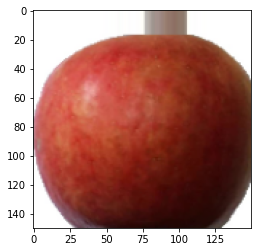

In [135]:
print(plt.imshow(imgg[1]))
print(imgg.shape)

['apple_crimson_snow_1']


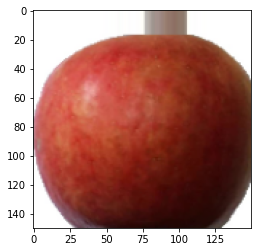

In [136]:
#img=cv2.imread('fruits-360-original-size/Training/apple_6/r0_0.jpg')
plt.imshow(imgg[1])
imgg = cv2.resize(imgg[1],(150,150))
imgg.shape
y_pred1 = np.argmax(model.predict(imgg.reshape(1, 150, 150, 3)), axis=1)
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
y_pred1 = [labels[k] for k in y_pred1]
print(y_pred1)


(150, 150, 3)


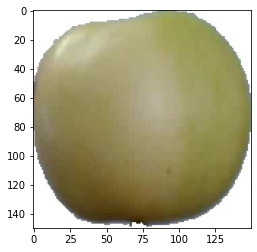

In [127]:
import cv2
img = load_img('fruits-360-original-size/Training/apple_6/r0_0.jpg', target_size = (150,150,3))
plt.imshow(img)

img = img_to_array(img)
print(img.shape)

img = np.expand_dims(img, axis=0)

result = model.predict(img)

In [101]:
print(result)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [102]:
single_predict = model.predict(img)
print(single_predict)
y_pred1 = np.argmax(single_predict,axis=1)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
y_pred1 = [labels[k] for k in y_pred1]
print(y_pred1)

ValueError: Failed to find data adapter that can handle input: <class 'PIL.Image.Image'>, <class 'NoneType'>